In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings; warnings.filterwarnings('ignore')
import scipy.stats as stats 

In [2]:
demo = pd.read_csv('cust_demographics.csv')
claims = pd.read_csv('claims.csv')

In [3]:
demo1=demo.rename(columns ={'CUST_ID' : 'customer_id'})
demo1

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [4]:
combine = pd.merge(left = claims, right = demo1, on = 'customer_id', how = 'left')
combine

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [94]:
combine.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the dollar sign.

In [5]:
combine[['claim_amount','symbol']]=combine['claim_amount'].str.split('$', 1, expand=True)

In [6]:
combine['claim_amount'].replace('$','',inplace=True)
combine

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,symbol
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,,2.0,No,NaN,NaN,NaN,NaN,NaN,1520
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,,1.0,No,NaN,NaN,NaN,NaN,NaN,25120


In [7]:
insurance_data = combine.drop('claim_amount',axis=1)
insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,symbol
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,NaN,NaN,NaN,NaN,NaN,1520
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,1.0,No,NaN,NaN,NaN,NaN,NaN,25120


In [8]:
insurance_data['symbol'] = insurance_data['symbol'].astype(float)

In [9]:
insurance_claim_data = insurance_data.rename(columns={'symbol':'claim_amount'})
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980.0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680.0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059.0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,NaN,NaN,NaN,NaN,NaN,1520.0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575.0
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,1.0,No,NaN,NaN,NaN,NaN,NaN,25120.0


# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [100]:
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980.0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680.0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059.0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,NaN,NaN,NaN,NaN,NaN,1520.0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575.0
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,1.0,No,NaN,NaN,NaN,NaN,NaN,25120.0


In [10]:
injury_claims = insurance_claim_data['police_report'].unique()
injury_claims

array(['No', 'Unknown', 'Yes'], dtype=object)

In [10]:
insurance_claim_data['police_report'].replace('Unknown','0 - Unreported',inplace=True)
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980.0
1,33985796,75740424,Crime,10/03/2018,Home,0 - Unreported,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680.0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059.0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,NaN,NaN,NaN,NaN,NaN,1520.0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575.0
1098,69299345,73449366,Other causes,03/21/2018,Auto,0 - Unreported,Material and injury,1.0,No,NaN,NaN,NaN,NaN,NaN,25120.0


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [11]:
insurance_claim_data.drop_duplicates('customer_id',inplace = True)
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980.0
1,33985796,75740424,Crime,10/03/2018,Home,0 - Unreported,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680.0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,NaN,NaN,NaN,NaN,NaN,3059.0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,NaN,NaN,NaN,NaN,NaN,1520.0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,NaN,NaN,NaN,NaN,NaN,23575.0
1098,69299345,73449366,Other causes,03/21/2018,Auto,0 - Unreported,Material and injury,1.0,No,NaN,NaN,NaN,NaN,NaN,25120.0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [77]:
insurance_claim_data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_amount           0
dtype: int64

In [12]:
for col in insurance_claim_data.columns:
    if insurance_claim_data[col].dtype == 'float64':
        insurance_claim_data[col].fillna(insurance_claim_data[col].mean(), inplace=True)
    elif insurance_claim_data[col].dtype == 'object':
        insurance_claim_data[col].fillna(insurance_claim_data[col].mode()[0], inplace=True)

In [13]:
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,2980.0
1,33985796,75740424,Crime,10/03/2018,Home,0 - Unreported,Material only,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,2980.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,3369.5
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1680.0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,2680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,Male,01-Apr-60,NY,123-346-2854,Gold,3059.0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,Male,01-Apr-60,NY,123-346-2854,Gold,1520.0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,Male,01-Apr-60,NY,123-346-2854,Gold,23575.0
1098,69299345,73449366,Other causes,03/21/2018,Auto,0 - Unreported,Material and injury,1.0,No,Male,01-Apr-60,NY,123-346-2854,Gold,25120.0


In [148]:
insurance_claim_data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_amount           0
dtype: int64

In [78]:
insurance_claim_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_amount           float64
dtype: object

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60
 

In [14]:
insurance_claim_data['DateOfBirth'] = pd.to_datetime(insurance_claim_data['DateOfBirth']).dt.strftime('19%y-%m-%d')
insurance_claim_data['DateOfBirth'] = pd.to_datetime(insurance_claim_data['DateOfBirth'])

In [15]:
insurance_claim_data['Year'] = insurance_claim_data['DateOfBirth'].dt.year
insurance_claim_data['Month'] = insurance_claim_data['DateOfBirth'].dt.month
#insurance_claim_data['day'] = insurance_claim_data['DateOfBirth'].dt.day



In [153]:
insurance_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_amount                  float64
Year                            int64
Month                           int64
day                             int64
dtype: object

In [17]:
insurance_claim_data['Year'].unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 1966, 1985, 1990, 1963,
       1969, 1987, 1965, 1967, 1974, 1980, 1981, 1995, 1996, 1962, 1994,
       1968, 1971, 1988, 1989, 1976, 1975, 1964, 1998, 1960, 1961, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983], dtype=int64)

In [16]:
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount,Year,Month
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,2980.0,1979,1
1,33985796,75740424,Crime,10/03/2018,Home,0 - Unreported,Material only,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,2980.0,1970,1
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,3369.5,1984,3
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1680.0,1986,5
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,2680.0,1977,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,3059.0,1960,4
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,Male,1960-04-01,NY,123-346-2854,Gold,1520.0,1960,4
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,23575.0,1960,4
1098,69299345,73449366,Other causes,03/21/2018,Auto,0 - Unreported,Material and injury,1.0,No,Male,1960-04-01,NY,123-346-2854,Gold,25120.0,1960,4


In [17]:
current_year = pd.Timestamp.now().year
insurance_claim_data['Age'] = current_year - insurance_claim_data['Year']
insurance_claim_data['Age_Category'] = pd.cut(insurance_claim_data['Age'], bins=[0, 18, 30, 60, float('inf')],
                                   labels=['Children', 'Youth', 'Adult', 'Senior'] )
insurance_claim_data['Month'] = insurance_claim_data['Month'].apply(lambda x: calendar.month_name[x])
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount,Year,Month,Age,Age_Category
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,2980.0,1979,January,44,Adult
1,33985796,75740424,Crime,10/03/2018,Home,0 - Unreported,Material only,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,2980.0,1970,January,53,Adult
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,3369.5,1984,March,39,Adult
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1680.0,1986,May,37,Adult
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,2680.0,1977,May,46,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,4.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,3059.0,1960,April,63,Senior
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,2.0,No,Male,1960-04-01,NY,123-346-2854,Gold,1520.0,1960,April,63,Senior
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,2.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,23575.0,1960,April,63,Senior
1098,69299345,73449366,Other causes,03/21/2018,Auto,0 - Unreported,Material and injury,1.0,No,Male,1960-04-01,NY,123-346-2854,Gold,25120.0,1960,April,63,Senior


In [171]:
insurance_claim_data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_amount           0
Year                   0
Month                  0
day                    0
Age                    0
Age_Category           0
dtype: int64

# 8. What is the average amount claimed by the customers from various segments?


In [19]:
segment = pd.pivot_table(data=insurance_claim_data,index='Segment',values='claim_amount',aggfunc='mean')
segment

,claim_amount
Segment,
Gold,12675.262946
Platinum,12368.233815
Silver,12267.349306


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [20]:
insurance_claim_data['claim_date'] = pd.to_datetime(insurance_claim_data['claim_date'])
cd = insurance_claim_data[insurance_claim_data['claim_date']<=pd.to_datetime('2018-10-01')-pd.DateOffset(days=20)]
tcda = cd.groupby('incident_cause')['claim_amount'].sum()
tcda

incident_cause
Crime                 7.294856e+05
Driver error          3.292987e+06
Natural causes        1.315024e+06
Other causes          3.779919e+06
Other driver error    3.384079e+06
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [27]:
insurance_claim_data['incident_cause'].nunique()

5

In [21]:
ci = insurance_claim_data[(insurance_claim_data.State.isin(['TX','DE','AK']))&(insurance_claim_data.incident_cause.isin(['Driver error','Other driver error']))&(insurance_claim_data.Age_Category==('Adult'))]
c = ci['customer_id'].count()
print(f'The total adults in the mentioned states for the mentinoed incidents are :',c)

The total adults in the mentioned states for the mentinoed incidents are : 27


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

array([<Axes: ylabel='Gold'>, <Axes: ylabel='Platinum'>,
       <Axes: ylabel='Silver'>], dtype=object)

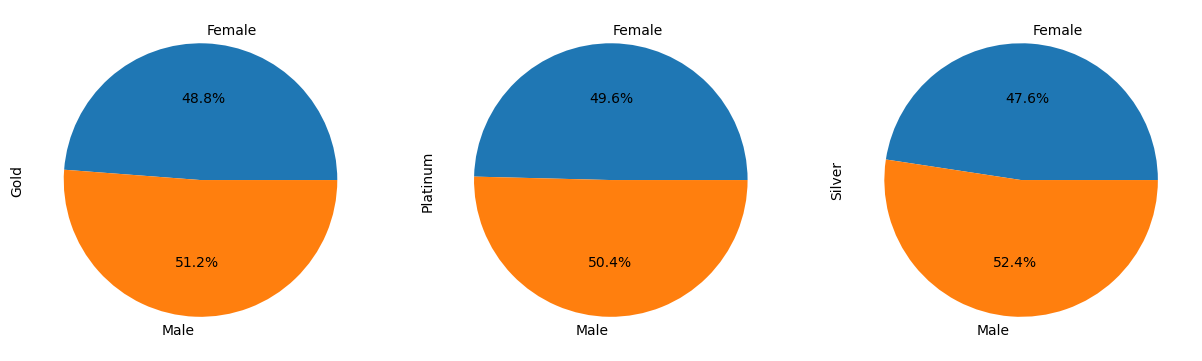

In [22]:
ca = pd.pivot_table(data = insurance_claim_data,index = 'gender',columns = 'Segment', values = 'claim_amount')
ca.plot(kind = 'pie',x='gender',subplots = True, figsize = [15,9],autopct='%1.1f%%',legend = False)

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

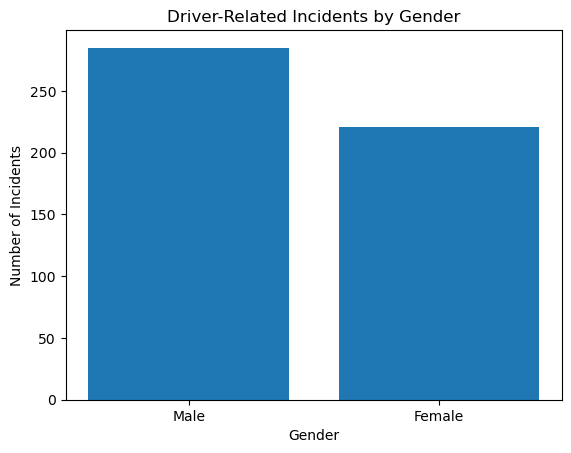

In [23]:
driver_related = insurance_claim_data[insurance_claim_data["incident_cause"].str.contains("driver", case=False)]
gender_counts = driver_related["gender"].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Driver-Related Incidents by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Incidents")
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

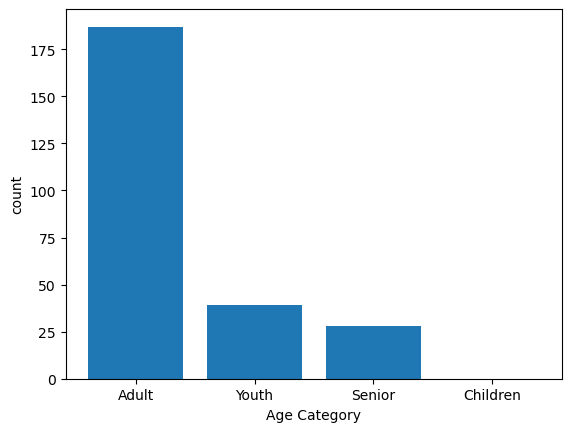

In [101]:
age = insurance_claim_data[(insurance_claim_data.fraudulent == 'Yes')]
age_fraud = age['Age_Category'].value_counts()
plt.bar(age_fraud.index, age_fraud.values)
plt.xlabel("Age Category")
plt.ylabel("count")
plt.figsize=[18,12]
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

<Axes: xlabel='Month'>

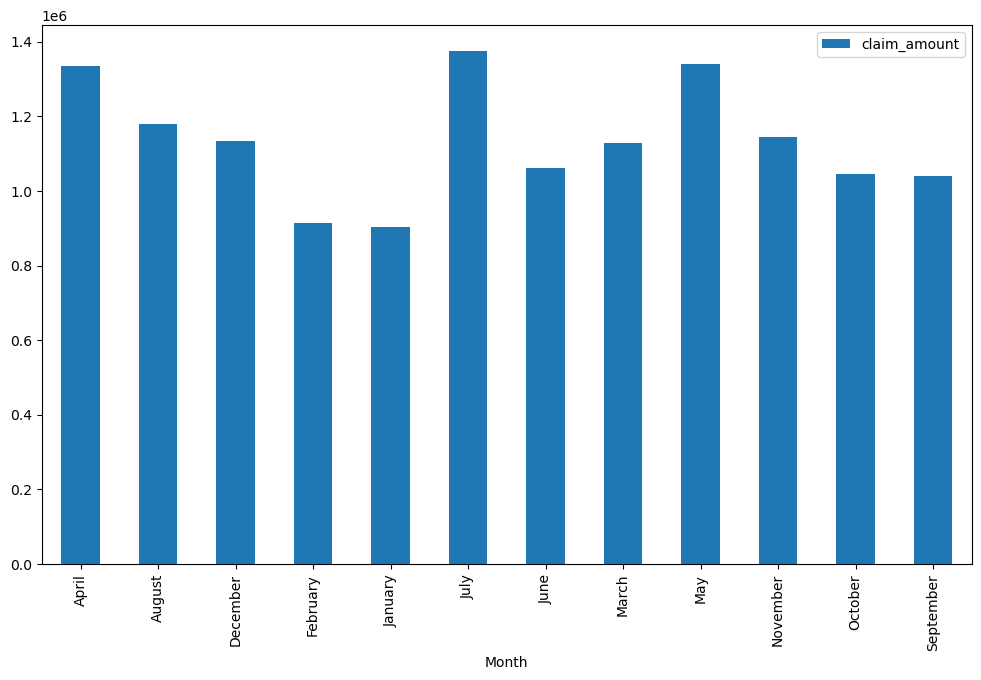

In [19]:
ta = pd.pivot_table(data=insurance_claim_data,index='Month',values='claim_amount',aggfunc='sum')
ta.plot(kind='bar',y='claim_amount', figsize=[12,7])

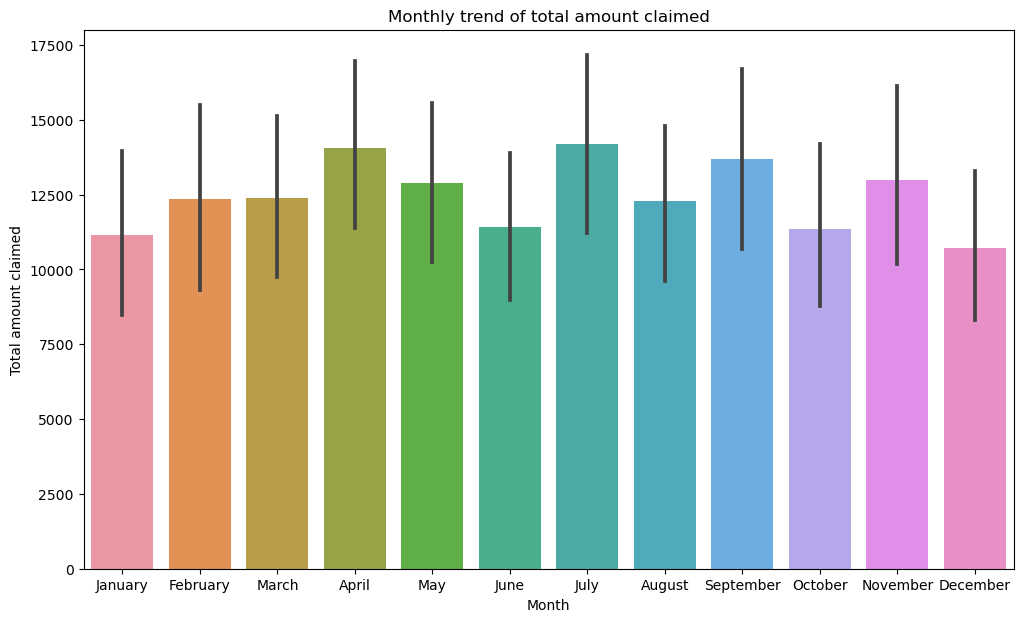

In [36]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mo = sns.barplot(data=ta, x=insurance_claim_data['Month'], y=insurance_claim_data['claim_amount'], order=month_order)
mo.set_xlabel('Month')
mo.set_ylabel('Total amount claimed')
mo.set_title('Monthly trend of total amount claimed')
fig = mo.get_figure()
fig.set_size_inches(12, 7)
#ta.plot(kind='bar',y='claim_amount', figsize=[12,7],  order=month_order)
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [104]:
#fig,axes=plt()
age = insurance_claim_data[(insurance_claim_data.fraudulent == 'Yes')]
age.pivot_table(index='gender',columns='Age_Category',values='claim_amount',aggfunc=sum)
age1 = insurance_claim_data[(insurance_claim_data.fraudulent == 'No')]
age1.pivot_table(index='gender',columns='Age_Category',values='claim_amount',aggfunc=sum)

Age_Category,Children,Youth,Adult,Senior
gender,,,,
Female,0.0,1.066854e+06,3.556498e+06,358828.36284
Male,0.0,1.063538e+06,3.800829e+06,465049.45428


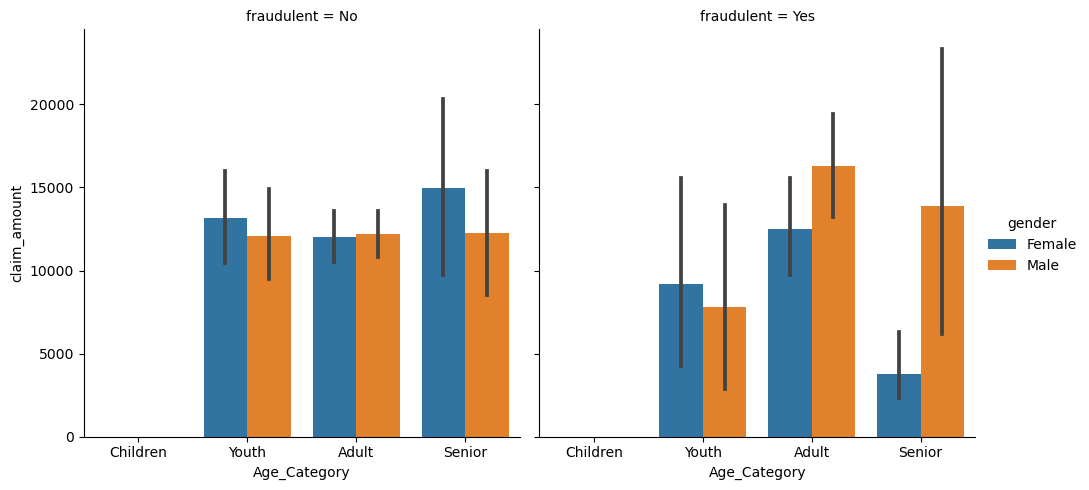

In [45]:
sns.catplot(data=insurance_claim_data, x='Age_Category', y='claim_amount', hue='gender', col = 'fraudulent', kind = 'bar')

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

# 16. Is there any similarity in the amount claimed by males and females?

In [32]:
amount = 'claim_amount'
male = insurance_claim_data.loc[insurance_claim_data.gender == 'Male', amount]
female= insurance_claim_data.loc[insurance_claim_data.gender == 'Female', amount]

print('mean spend of male:', male.mean() )
print('mean spend of female:', female.mean() )

mean spend of male: 12765.032998308838
mean spend of female: 12100.717432755706


In [33]:
# H0: There is no similarity in the amount claimed by males and females
# Ha: There is similarity in the amount claimed by males and females
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( male, female )

Ttest_indResult(statistic=0.821612848932144, pvalue=0.4114767802889234)

In [34]:
# Conclusion

# Since the calculated p_value is greater than 0.01, we fail to reject Null Hypothesis.
# we can claim that there is no similarity in the amount claims made by males and females

np.var(female)

172483455.8140038

# 17. Is there any relationship between age category and segment?

In [37]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( insurance_claim_data.Age_Category, insurance_claim_data.Segment )
obs_freq

Segment,Gold,Platinum,Silver
Age_Category,,,
Youth,71,69,68
Adult,272,266,257
Senior,43,26,21


In [ ]:
# Ho: There is no relationship between age category and segment
# Ha: There is a relationship between age category and segment
# CI: 95%, p: 0.05

# perform the test 
stats.chi2_contingency( obs_freq )

In [ ]:
# Conclusion
# The calculated p_value is 0.1369 which is greater than the defined p_value which 0.05.
# So, We fail to reject null hypothesis and can claim there is no relationship between age category and segment

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000 dollars.

In [38]:
# sample_test
# sample to be considered
variable_name = 'claim_amount'

# mean values to be compared
pop_mean = 10000
sample = insurance_claim_data.loc[:,variable_name]
mean_sample = sample.mean()

# display the means
print('population mean: ', pop_mean, '| sample mean: ', mean_sample )

population mean:  10000 | sample mean:  12444.72714007782


In [ ]:
# Defining the hypothesis
#H0: The mean claim amount in the current year is equal to $10,000.
#Ha: The mean claim amount in the current year is significantly different from $10,000
# CI: 99%, p: 0.01

In [39]:
# perform the test
stats.ttest_1samp(a = sample, popmean = pop_mean)

TtestResult(statistic=6.051937772221075, pvalue=1.9644042804907075e-09, df=1092)

In [ ]:
# Conclusion

# since the calculate p value is lesser than the defined p value, we fail to reject the alternate hypothesis
# We can conclude the mean claim amount in the current year is significantly different from $10,000

# 19. Is there any difference between age groups and insurance claims?

In [50]:
# Annova test
# declare the variable for which we want to do the analysis
variable_name = 'claim_amount'

# filter the data based on segments
Youth = insurance_claim_data.loc[ insurance_claim_data['Age_Category'] == 'Youth', variable_name ]
Adult = insurance_claim_data.loc[ insurance_claim_data['Age_Category'] == 'Adult', variable_name ]
Senior = insurance_claim_data.loc[ insurance_claim_data['Age_Category'] == 'Senior', variable_name ]

# display the mean of the three sample
print( 'mean of Youth: ', Youth.mean(), '| mean of Adult: ', Adult.mean(), '| mean of Senior: ', Senior.mean() )

mean of Youth:  11846.781895390603 | mean of Adult:  12649.412343073196 | mean of Senior:  12018.592412451362


In [51]:
#Ho: There is no relationship between age group and insurance claimed
#Ha: There is relationship between age group and insurance claimed
# CI: 95%, p: 0.05

# perform the test
stats.f_oneway( Youth, Adult, Senior )

F_onewayResult(statistic=0.34725221644722964, pvalue=0.7067052264087558)

In [ ]:
# conclusion

# Since the calculate p value(0.70) is greater than the defined p value(0.05)
# We fail to reject the null hypothesis and can claim there is no relationship between age group and insurance claimed

# 20. Is there any relationship between total number of policy claims and the claimed amount?

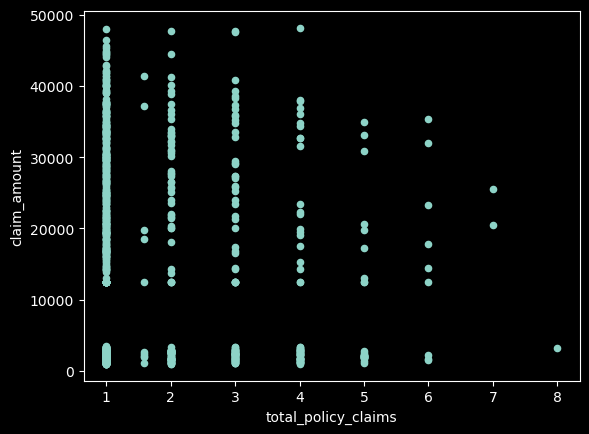

In [55]:
insurance_claim_data.plot( kind = 'scatter', x ='total_policy_claims', y = 'claim_amount' )
plt.show()

In [56]:
# Ho: There is no relationship b/w the total number of policy claimed and the claim amount 
# Ha:There is relationship b/w the total number of policy claimed and the claim amount 
# CI: 95%, p: 0.05

# perform the test 
stats.pearsonr( insurance_claim_data['total_policy_claims'],insurance_claim_data['claim_amount'])

PearsonRResult(statistic=-0.016409477672452967, pvalue=0.5878721766398625)

In [ ]:
#conclusion

#We fail to reject null hypothesis and because of the neagative value we can claim its negatively correlated
#There is no relationsip between Number of policies claimed and the amount claimed

In [36]:
insurance_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,claim_amount,Year,Month,Age,Age_Category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,2980.0,1979,January,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,0 - Unreported,Material only,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,2980.0,1970,January,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,3369.5,1984,March,39,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1680.0,1986,May,37,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,2680.0,1977,May,46,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,4.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,3059.0,1960,April,63,Senior
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,2.0,No,Male,1960-04-01,NY,123-346-2854,Gold,1520.0,1960,April,63,Senior
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,2.0,Yes,Male,1960-04-01,NY,123-346-2854,Gold,23575.0,1960,April,63,Senior
1098,69299345,73449366,Other causes,2018-03-21,Auto,0 - Unreported,Material and injury,1.0,No,Male,1960-04-01,NY,123-346-2854,Gold,25120.0,1960,April,63,Senior
